## E-commerce Customer Churn Analysis

In [73]:
#1 - Data Acquisition & Loading

In [74]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Load Data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [76]:
#2 - Data Preprocessing & Cleaning

In [77]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
print(df.describe(include='all'))

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

In [80]:
#Checking for missing values

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [81]:
#Checking for duplicates

print(df.duplicated().sum())

0


In [82]:
#Handling missing values as TotalCharges column detected missing values while manual searching. 
#This might be since its in the type object

# Convert 'TotalCharges' to numeric, coercing errors for now
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# For customers with 0 tenure, TotalCharges might be NaN. Let's assume 0 charges if tenure is 0.
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

# Calculate the median first
median_total_charges = df['TotalCharges'].median()

# Fill NA values by reassigning the Series
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

In [83]:
#Ensuring Correct Data Types

df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [84]:
#Feature Engineering

#Creating tenure groups
bins = [0, 12, 24, 36, 48, 60, 72] # Covers tenures from 0 up to just before 72
labels = ['0-12 M', '13-24 M', '25-36 M', '37-48 M', '49-60 M', '61-72 M']

df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)

if 0 in df['tenure'].unique():
    if '0 M' not in df['TenureGroup'].cat.categories:
        df['TenureGroup'] = df['TenureGroup'].cat.add_categories(['0 M'])

    df.loc[df['tenure'] == 0, 'TenureGroup'] = '0 M'

In [85]:
#Handling Categorical Variables

categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [86]:
#3 - KPI Calculation

In [87]:
#Overall Churn Rate

churn_rate = df['Churn_numeric'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 26.54%


In [88]:
#Churn rate by Contract Type

churn_by_contract = df.groupby('Contract')['Churn_numeric'].mean().reset_index()
churn_by_contract.rename(columns={'Churn_numeric': 'Churn Rate'}, inplace=True)
print("KPI: Churn Rate by Contract Type:\n", churn_by_contract)

KPI: Churn Rate by Contract Type:
          Contract  Churn Rate
0  Month-to-month    0.427097
1        One year    0.112695
2        Two year    0.028319


In [89]:
#Average Tenure of Churned vs Non-Churned Customers

avg_tenure_churn_status = df.groupby('Churn')['tenure'].mean().reset_index()
print("KPI: Average Tenure by Churn Status:\n", avg_tenure_churn_status)

KPI: Average Tenure by Churn Status:
   Churn     tenure
0    No  37.569965
1   Yes  17.979133


In [90]:
#Average Monthly Charges of Churned vs Non-Churned Customers

avg_monthly_charges_churn_status = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()
print("KPI: Average Monthly Charges by Churn Status:\n", avg_monthly_charges_churn_status)

KPI: Average Monthly Charges by Churn Status:
   Churn  MonthlyCharges
0    No       61.265124
1   Yes       74.441332


In [91]:
#4 - Exploratory Data Analysis (EDA) & Insightful Analysis

In [92]:
#Churn by Categorical Features

#Categories can be commented or removed according to the requirement
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']:
    if col in df.columns:
        churn_summary = df.groupby(col, observed=True)['Churn_numeric'].agg(['mean', 'count']).reset_index()
        churn_summary.rename(columns={'mean': 'Churn Rate'}, inplace=True)
        print(f"\nChurn Rate by {col}:\n", churn_summary)


Churn Rate by gender:
    gender  Churn Rate  count
0  Female    0.269209   3488
1    Male    0.261603   3555

Churn Rate by Partner:
   Partner  Churn Rate  count
0      No    0.329580   3641
1     Yes    0.196649   3402

Churn Rate by Dependents:
   Dependents  Churn Rate  count
0         No    0.312791   4933
1        Yes    0.154502   2110

Churn Rate by PhoneService:
   PhoneService  Churn Rate  count
0           No    0.249267    682
1          Yes    0.267096   6361

Churn Rate by MultipleLines:
       MultipleLines  Churn Rate  count
0                No    0.250442   3390
1  No phone service    0.249267    682
2               Yes    0.286099   2971

Churn Rate by InternetService:
   InternetService  Churn Rate  count
0             DSL    0.189591   2421
1     Fiber optic    0.418928   3096
2              No    0.074050   1526

Churn Rate by OnlineSecurity:
         OnlineSecurity  Churn Rate  count
0                   No    0.417667   3498
1  No internet service    0.074050   

In [93]:
kpi_summary_data = {
    'KPI': ['Overall Churn Rate', 'Avg Tenure (Non-Churned)', 'Avg Tenure (Churned)',
            'Avg Monthly Charges (Non-Churned)', 'Avg Monthly Charges (Churned)'],
    'Value': [
        f"{df['Churn_numeric'].mean():.2%}",
        df[df['Churn_numeric']==0]['tenure'].mean(),
        df[df['Churn_numeric']==1]['tenure'].mean(),
        df[df['Churn_numeric']==0]['MonthlyCharges'].mean(),
        df[df['Churn_numeric']==1]['MonthlyCharges'].mean()
    ]
}
kpi_summary_df = pd.DataFrame(kpi_summary_data)
print("--- Key Performance Indicators Summary ---")
print(kpi_summary_df)

--- Key Performance Indicators Summary ---
                                 KPI      Value
0                 Overall Churn Rate     26.54%
1           Avg Tenure (Non-Churned)  37.569965
2               Avg Tenure (Churned)  17.979133
3  Avg Monthly Charges (Non-Churned)  61.265124
4      Avg Monthly Charges (Churned)  74.441332


In [94]:
#5 - Visualizations (Charts & Tables)

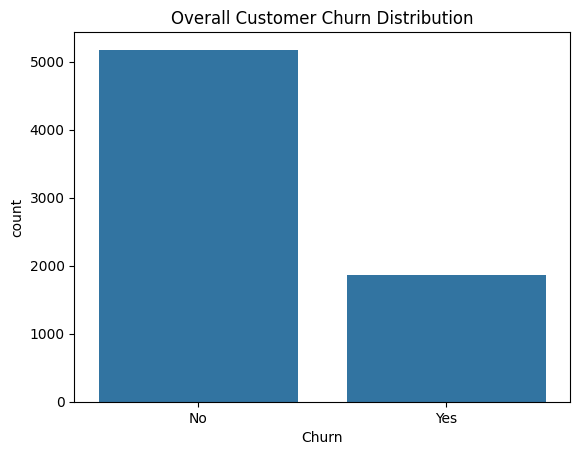

In [95]:
#Overall Churn Rate

sns.countplot(x='Churn', data=df)
plt.title('Overall Customer Churn Distribution')
plt.show()

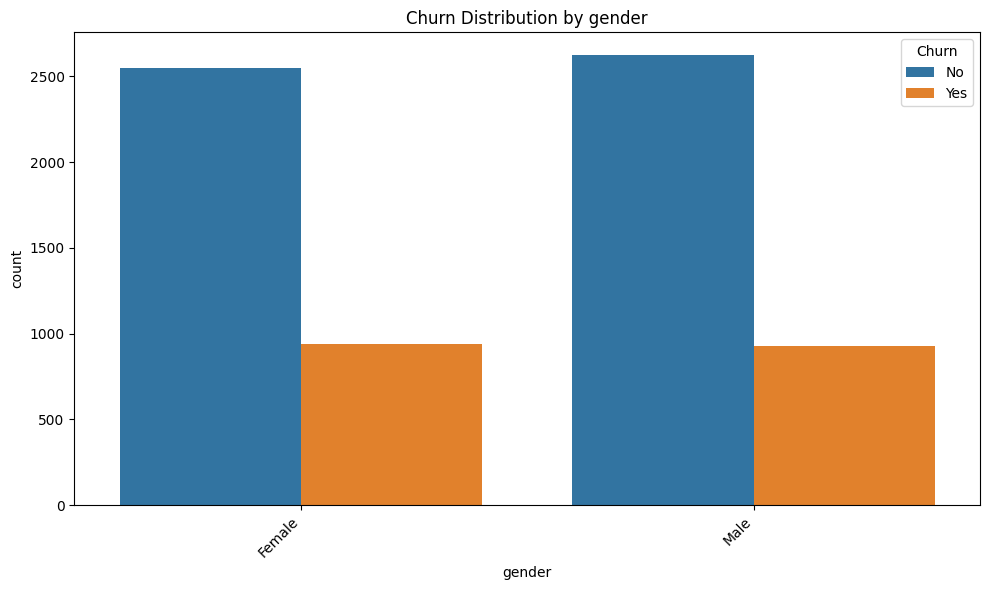

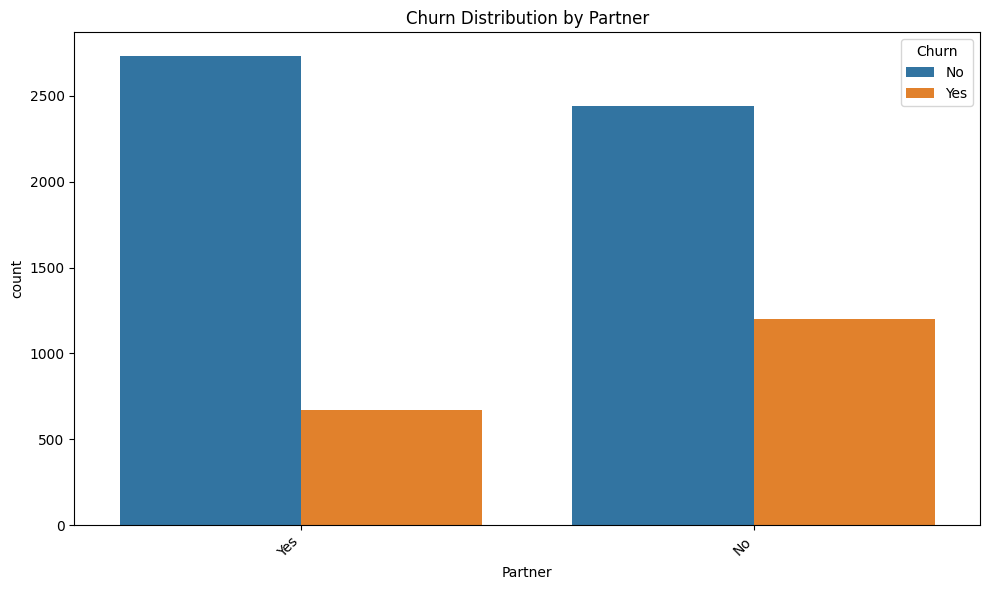

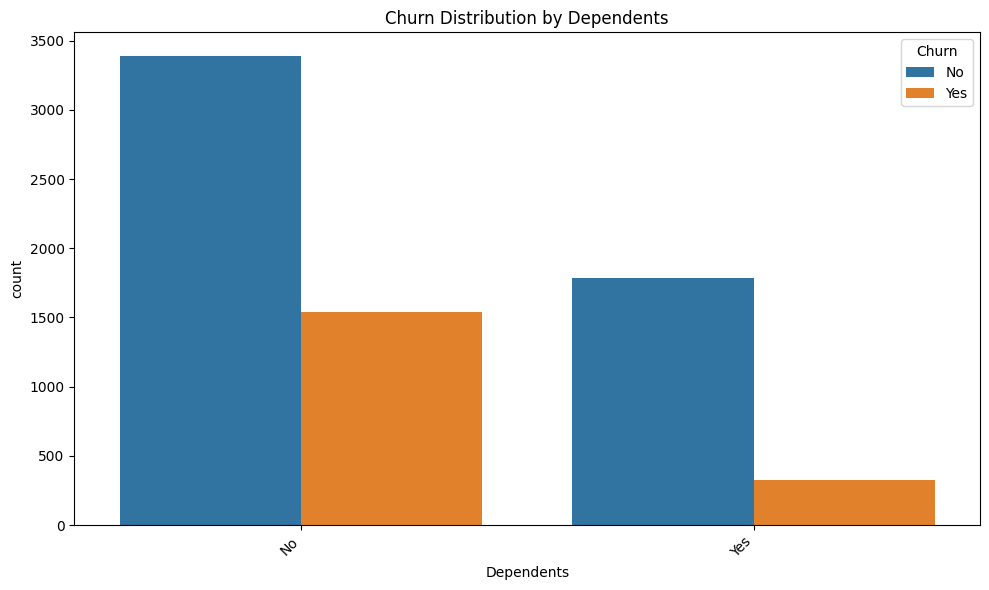

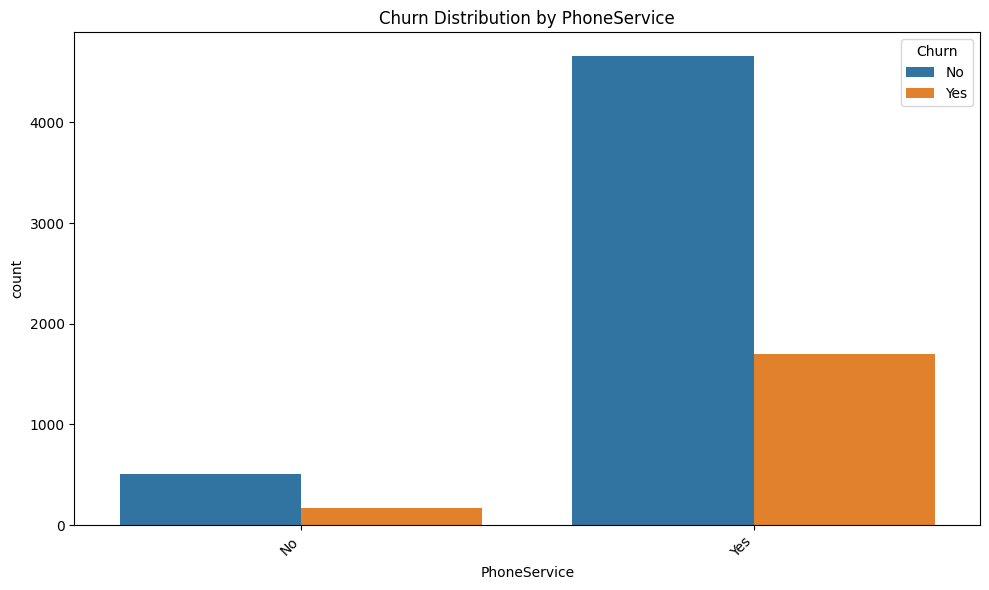

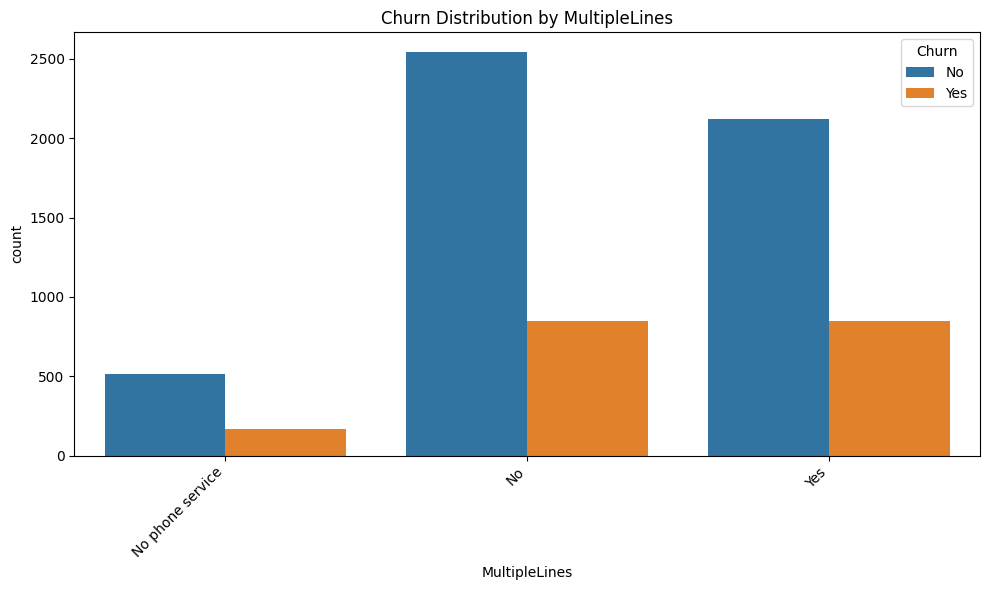

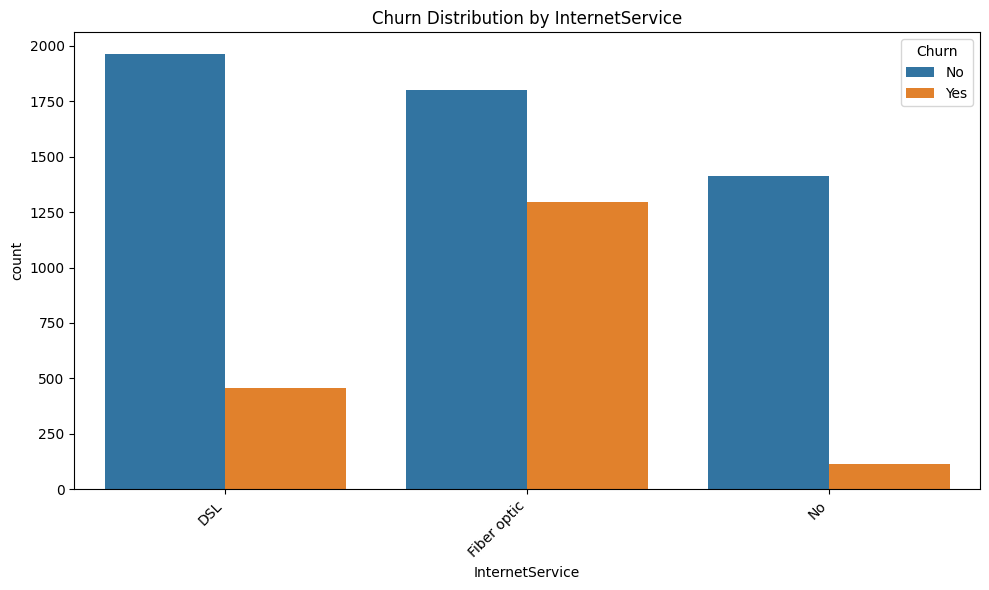

In [96]:
#Churn by Categorical Features

for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            #'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            #'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup'
           ]: #Use comments for the categories according to the need
    
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'Churn Distribution by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

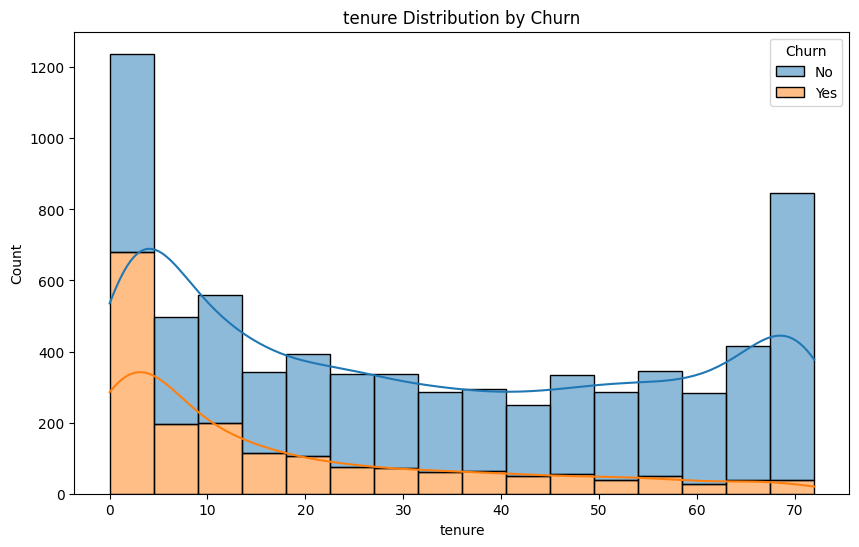

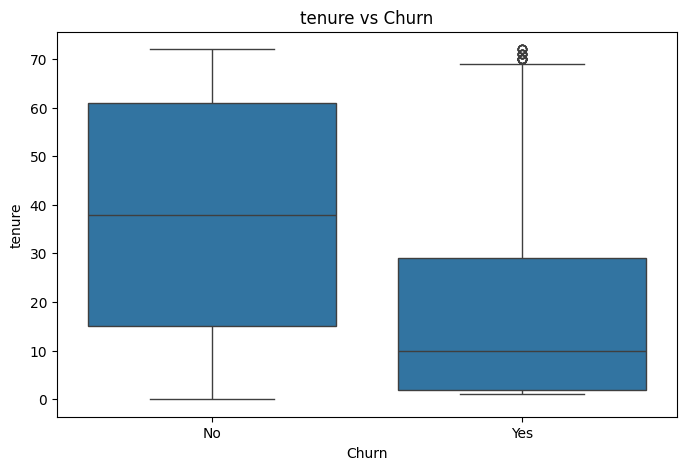

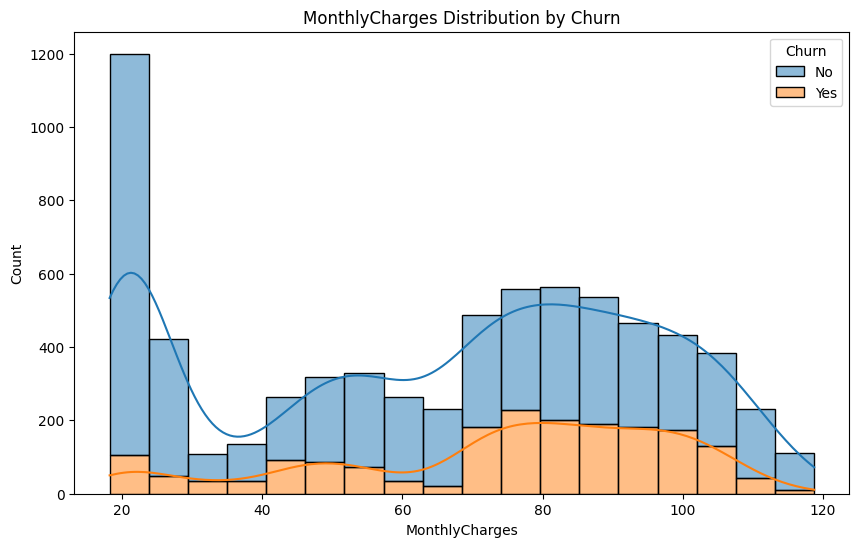

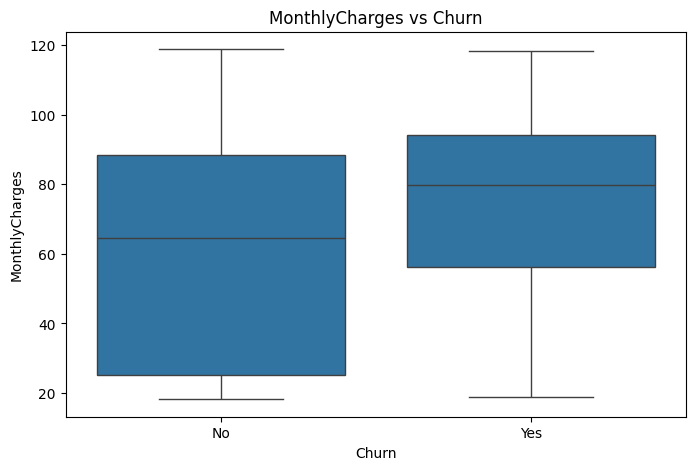

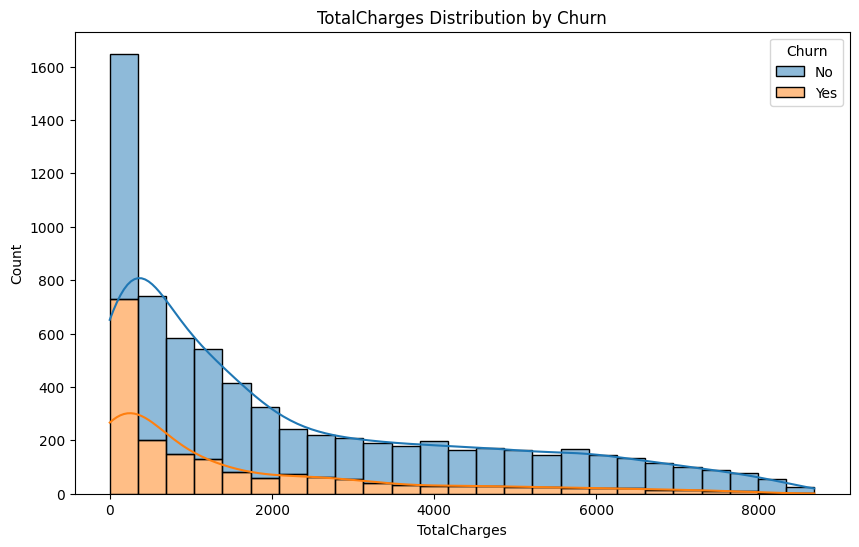

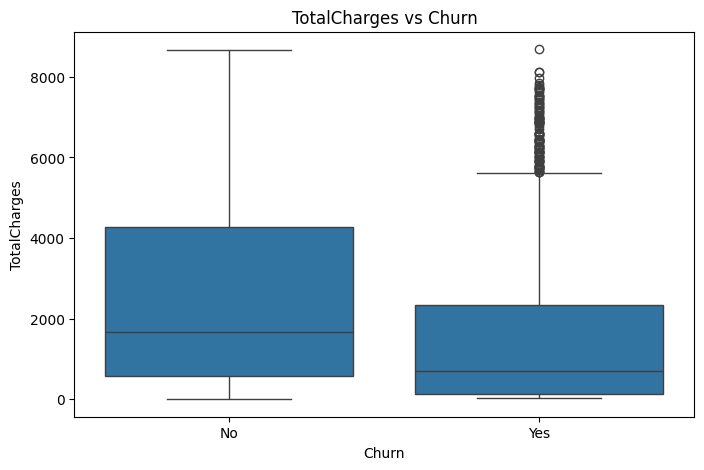

In [97]:
# Churn by Numerical Features

# Tenure, MonthlyCharges, TotalCharges
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=True)
    plt.title(f'{col} Distribution by Churn')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

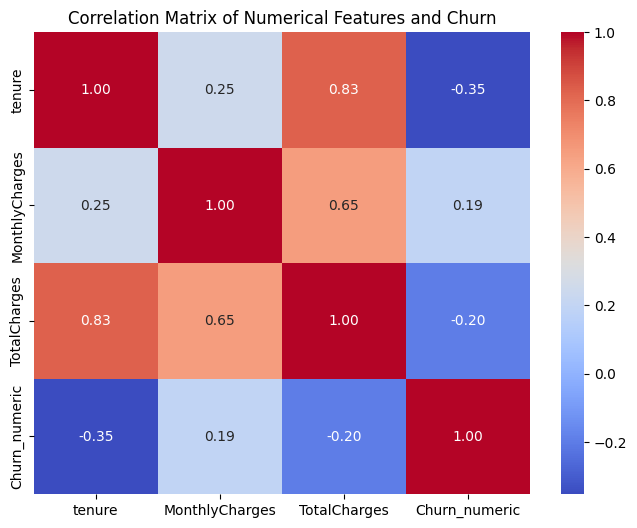

In [98]:
# Correlation Analysis

correlation_matrix = df[numerical_cols + ['Churn_numeric']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

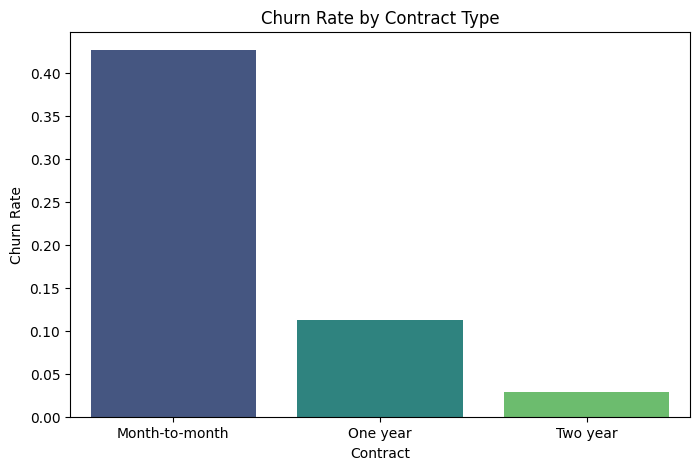

In [99]:
# Churn Rate by Contract Type

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Contract',
    y='Churn Rate',
    data=churn_by_contract,
    hue='Contract',
    palette='viridis',
    legend=False
)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

### End of the Script